# Intelligent Systems

## Academic year 2024-2025

### Lab 1: State space search

#### Teachers

* Juan Carlos Alfaro Jimenez: JuanCarlos.Alfaro@uclm.es
* Maria Julia Flores Gallego: Julia.Flores@uclm.es
* Ismael Garcia Varea: Ismael.Garcia@uclm.es
* Adrian Rodriguez Lopez: Adrian.Rodriguez18@alu.uclm.es

## Autonomous driving!

## 1. Introduction

Within the framework of a pilot project of the **Ministry of Transport and Sustainable Mobility**, the aim of which is to provide a personalised urban transport service for people with reduced mobility, we have been commissioned to study the deployment of a fleet of autonomous vehicles in different towns and cities of the country based on a series of indicators: population size, population density, demand for the service, etc. These autonomous vehicles must have an intelligent driving system that allows said vehicles to carry a series of people from a point of origin to their destination safely and efficiently.

Related to this project, **for the moment, we are asked to design an algorithm that is capable of optimizing the transportation of a person from a place of origin to a specific destination** within a city. In this scenario, the autonomous vehicle will have to navigate a network of urban streets and intersections, where all routes are potentially valid. However, **the system must optimize the path selection** not only to find a valid route, but also to **minimize the travel time**. This implies that the artificial intelligence must consider factors such as distance, the speed allowed on each street and any other relevant factor that may affect the total travel time.

### 1.1. Goals of this lab assignment

* Implement **breadth-first** and **depth-first** uninformed search strategies to find a path from a starting point to a destination location.

* Implement **best first** and **A\*** informed search strategies using appropriate heuristics to solve the problem at hand.

In this work we will put into practice state space search techniques. To do so, we will implement and use some of the algorithms seen in topics two and three to solve a classic problem, that is, searching for routes in a graph.

We will also analyze and compare the performance of the algorithms by running them on different instances of the problem and providing different initial and objective states.

We hope this hands-on practice helps you deepen your understanding of AI search strategies and encourages you to think about how these techniques can be applied in real-world situations to aid in navigation operations and other critical tasks.

**Good luck!**

## 2. Problem description

You will have to solve a problem in which an autonomous vehicle must find the fastest route between any two intersections in a city. The search space is defined by an urban road system where the vehicle can move in several directions to reach its destination.

More formally, the problem can be defined as:

* Initial state: A starting point that represents the vehicle's initial intersection.
* States: All intersections in the city are valid for traffic and can be visited by vehicle.
* Final state: Arriving at the destination intersection.
* Actions: Move from one intersection to another (that must be linked) through the city streets.

### 2.1. Illustrative example

A possible example of this problem could be the one shown in the following image, which shows a part of the city of Albacete:






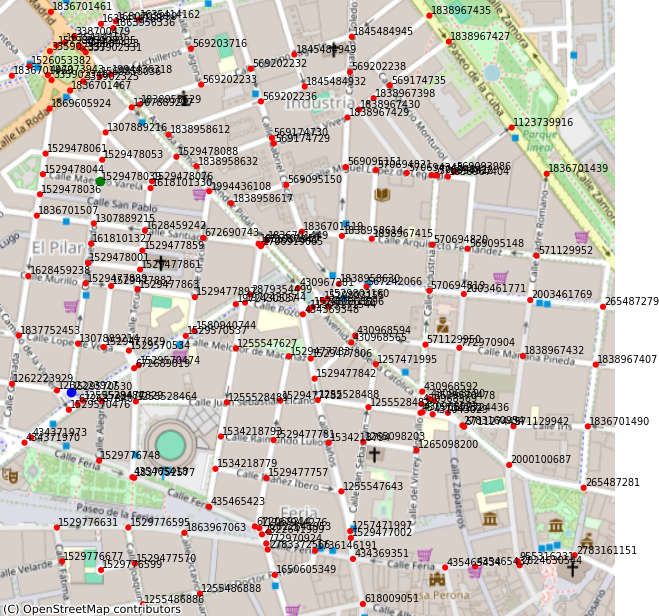

In [4]:
from IPython.display import Image, display

display(Image("/content/drive/MyDrive/Colab Notebooks/figures/medium/plaza_isabel_ii_albacete_500_0.png"))


In this case, the objective would be to go from the intersection with identifier `621983933`, represented in green; to the intersection with identifier `1322977378`, represented in blue.

---

##### Notes:

* The file containing the image must be saved in the path indicated in the code for this cell.

---

## 3. Development of the lab assignment

During the development of this lab, a set of problem instances will be provided. The dimensionality will be variable, and the algorithms implemented must be efficient enough to work correctly with all the instances provided. In the evaluation of the practice, it will be carried out with scenarios different from those provided, generated automatically and of different dimensionality.

### 3.1 Input Problems

Each scenario will be given in a file in `json` format that contains the following information, following the format of a dictionary whose keys are:
```JSON
{
	"address": "Plaza Santa Teresa de Jesus Jornet, Albacete",
	"distance": 250,
	"initial": 442882995,
	"final": 1533690307,

	"intersections":
		[{	"identifier": 344495530,
			"longitude": -1.8499485,
			"latitude": 38.9839544
		 },
		 {	"identifier": 442882008,
		 	"longitude": -1.8534845,
		 	"latitude": 38.9831464
		 }],



 	"segments":
		 [{	"origin": 344495530,
			"destination": 344495531,
			"distance": 130.377,
			"speed": 40
		  }]
}
```
* `address`: Address used
* `distance`: Maximum radius used to draw intersections and segments around the address
* `intersections`: List of dictionaries with information on intersections
* `segments`: List of dictionaries with information about segments, that is, streets between two intersections
* `initial`: Initial intersection
* `final`: Final intersection

In each dictionary in `intersections`, there are three keys:

* `identifier`: Intersection identifier
* `longitude`: Length of the intersection
* `latitude`: Latitude of the intersection

In each dictionary in `segments`, there are four keys:

* `origin`: Origin intersection
* `destination`: Destination intersection
* `distance`: Distance between the two intersections
* `speed`: Maximum speed allowed between the two intersections

## 4. Work plan

### 4.1. Tasks

* State space design:
    * Describe how the state space, actions, and cost of actions will be represented.

* Implementation of search strategies:
    * Implement at least two uninformed search strategies.
    * Implement at least two informed search strategies, using appropriate heuristics to find optimal routes.

* Experimentation and analysis:
    * Analyze the performance of the implemented strategies in terms of optimization of time, (memory) space and routes.
    * Compare and contrast the results obtained from different search strategies.

* Report:
    * Write a report detailing the process followed, the strategies implemented and the results obtained.

More details about each task are provided below.

### 4.2. Evaluation of the practice

The evaluation of the practice will be carried out through an individual exam in which the following will be taken into account:

* Correct implementation of search strategies: 50%
* State space design and heuristics: 25%
* Experimentation carried out and analysis of results: 25%

All of this is weighted by the level of knowledge that the student offers of the practice in the exam, which is a personal interview.

### 4.3. Dates

* Deadline to submit code: **October 31, 2024**
* Deadline for submission of the report: **End of the semester**

### 4.4. Problem formalization and examples

First, route finding in a city must be formalized as a state-space search problem, defining its basic elements. All implementations must refer to graph search, so it is important to note that repeated states must be handled.

### 4.5. Implementation

The implementation must be done in `Python` language. To do this, you must code your own class structure for formalizing the problem and then implement the algorithms studied in the theory classes to solve the search problem posed. It is recommended to create a class for each entity that defines a search problem, namely, state, action, node, problem, search, etc.

**It is recommended to test each of the classes created after their implementation to verify their correct operation before integrating them into the rest of the code.**

---

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
# =============================================================================
# Imports
# =============================================================================
import json
from abc import ABC, abstractmethod
import time
from datetime import timedelta
from queue import PriorityQueue
from datetime import timedelta
from geopy.distance import geodesic
import heapq
from itertools import count


#### Class `Action`

In [7]:
class Action:
    def __init__(self, origin, destination, distance, speed):
        self.origin = origin
        self.destination = destination
        self.distance = distance
        self.speed = speed
        self.cost = distance / (speed/3.6)

    def __repr__(self):
        return (f"Action({self.origin} to {self.destination} | "
                f"distance: {self.distance}, speed: {self.speed}, cost: {self.cost})")

    def __str__(self):
        return ('The intersection starts on ' + str(self.origin) +
                ' and finishes at ' + str(self.destination) +
                ', with a distance of ' + str(self.distance) +
                ', speed: ' + str(self.speed) +
                ', time cost: ' + f"{self.cost:.2f}")



#### Class `State`

In [60]:
class State:
    def __init__(self,id,lon,lat):
            self.identifier = id
            self.longitude = lon
            self.latitude = lat

    def __eq__(self, other):
        return isinstance(other, State) and self.identifier == other.identifier

    def __hash__(self):
        return hash(self.identifier)

    def __repr__(self):
        return (f"State({self.identifier} | "
                f"latitude: {self.latitude}, longitude: {self.longitude})")

    def __str__(self):
        return ('The state corresponds to intersection ' + str(self.identifier) +
                ', located at latitude: ' + str(self.latitude) +
                ', and longitude: ' + str(self.longitude))


#### Class `Node`.

In [9]:
class Node:
    def __init__(self, state, depth=0, cost=0, parent=None, action=None):
        self.state = state
        self.depth = depth          #In case it's root, 0 by default
        self.cost = cost            #In case it's root, 0 by default
        self.parent = parent        #In case it's root, None by default
        self.action = action        #In case it's root, None by default (action to get to the child state)


    def __eq__(self,other):
       return isinstance(other, Node) and self.state == other.state

    #Method to resolve ties on comparisons of nodes (smaller id has priority in informed search algorithms)
    def __lt__(self, other):
        return self.cost < other.cost

    def getDepth(self):
        return self.depth

    def __str__(self):
        return ('The node is at state: '  + str(self.state) +
                ', with depth: ' + str(self.depth) +
                ', and cumulative cost: ' + str(self.cost))

    def __repr__(self):
        return f"Node({self.state}, cost={self.cost}, depth={self.depth})"

#### Class `Problem`

In [10]:
class Problem:
    def __init__(self, filename):
        with open(filename, mode='r', encoding='utf8') as file:
            self.data = json.load(file)

        self.initialIntersection = self.data['initial']
        self.finalIntersection = self.data['final']

        for inter in self.data['intersections']:
            if inter['identifier'] == self.initialIntersection:
                self.initialState = State(inter['identifier'], inter['longitude'], inter['latitude'])
            if inter['identifier'] == self.finalIntersection:
                self.finalState = State(inter['identifier'], inter['longitude'], inter['latitude'])

        self.actions = self.generate_action()
        self.intersections = {i["identifier"]: i for i in self.data["intersections"]}

    def generate_action(self):
        actions = {}
        for s in self.data['segments']:
            origin, dest, dist, spd = s['origin'], s['destination'], s['distance'], s['speed']
            if origin not in actions:
                actions[origin] = []
            actions[origin].append(Action(origin, dest, dist, spd))
        for origin in actions:
            actions[origin].sort(key=lambda a: a.cost)  # Ordenar por menor coste
        return actions

    def check_goal_state(self, state):
        return state == self.finalState

    def __str__(self):
        return f"Problem from {self.initialIntersection} to {self.finalIntersection}"




In [11]:
p = Problem('/content/drive/MyDrive/Colab Notebooks/problems/small/plaza_isabel_ii_albacete_250_0.json')

print(p)
print("Initial State:", p.initialState,"\n")
print("Final State:", p.finalState ,"\n")


# Acceso directo a las acciones desde el identificador del estado inicial
initial_id = p.initialState.identifier

if initial_id in p.actions:
    print(f"Number of actions available from initial state ({initial_id}): {len(p.actions[initial_id])}\n")
    print("First action from initial state:")

    print("\t" , p.actions[initial_id][0])
else:
    print("No actions available from the initial state.")


Problem from 1972430537 to 1255528488
Initial State: The state corresponds to intersection 1972430537, located at latitude: 38.9997331, and longitude: -1.8625351 

Final State: The state corresponds to intersection 1255528488, located at latitude: 38.9982798, and longitude: -1.8609381 

Number of actions available from initial state (1972430537): 2

First action from initial state:
	 The intersection starts on 1972430537 and finishes at 1972430544, with a distance of 15.863, speed: 30, time cost: 1.90


#### Class `Search`

In [113]:
from abc import ABC, abstractmethod
from datetime import timedelta
import time

class Search(ABC):
    def __init__(self, problem):
        self.problem = problem
        self.open = None
        self.closed_states = set()
        self.execution_time = 0
        self.total_cost = 0
        self.nodes_generated = 0
        self.nodes_expanded = 0
        self.max_nodes_stored = 0
        self.solution_depth = 0
        self.path_length = 0
        self.node_id_counter = 1
        self.solution_path = []
        self.solution_found = False
        self.reverse_successors = False
        self.open_states = None  # Activar solo en A* o Best-First si se desea

    @abstractmethod
    def insert_node(self, node, node_list): pass

    @abstractmethod
    def extract_node(self, node_list): pass

    @abstractmethod
    def is_empty(self, node_list): pass

    def generate_successors(self, node):
        successors = []
        for action in self.problem.actions.get(node.state.identifier, []):
            dest_id = action.destination
            dest_info = self.problem.intersections[dest_id]
            new_state = State(dest_id, dest_info["longitude"], dest_info["latitude"])
            new_node = Node(new_state, node.depth + 1, node.cost + action.cost, node, action)
            successors.append(new_node)
            self.nodes_generated += 1
            self.node_id_counter += 1
        return successors

    def recover_path(self, node):
        path = []
        while node.parent:
            path.append(node.action)
            node = node.parent
        return list(reversed(path))

    def display_solution(self, iterative=False):
        print(self.problem)
        print()
        if not self.solution_found:
            print("Generated nodes:", self.nodes_generated)
            print("Expanded nodes:", self.nodes_expanded)
            print("Execution time:", timedelta(seconds=self.execution_time))
            print("Solution length:", 0)
            print("Solution cost:", timedelta(seconds=0))
            print("Solution: []")
            return False
        else:
            print("Generated nodes:", self.nodes_generated)
            print("Expanded nodes:", self.nodes_expanded)
            print("Execution time:", timedelta(seconds=self.execution_time))
            print("Solution length:", self.solution_depth)
            print("Solution cost:", timedelta(seconds=self.total_cost))
            formatted = [f"{a.origin} → {a.destination} ({a.cost})" for a in self.solution_path]
            print("Solution:", "[" + ", ".join(formatted) + "]")
            return True

    def do_search(self, max_depth=None, iterative=False):
          start_time = time.perf_counter()
          self.insert_node(Node(self.problem.initialState), self.open)

          while not self.is_empty(self.open):
              if not isinstance(self.open, list) and not isinstance(self.open, PriorityQueue):
                  self.max_nodes_stored = max(self.max_nodes_stored, len(self.open))

              current = self.extract_node(self.open)

              # 💡 Evitar reexpandir estados ya visitados
              if current.state in self.closed_states:
                  continue

              # 💡 Ignorar nodos dominados por otros mejores en open_states
              if self.open_states is not None:
                  sid = current.state.identifier
                  if sid in self.open_states and current.cost > self.open_states[sid]:
                      continue

              # 🎯 Comprobación de objetivo
              if self.problem.check_goal_state(current.state):
                  self.solution_found = True
                  self.total_cost = current.cost
                  self.solution_depth = current.depth
                  self.solution_path = self.recover_path(current)
                  self.execution_time = time.perf_counter() - start_time
                  return self.display_solution(iterative)

              # 🔁 Generar sucesores solo si no hemos llegado a la profundidad máxima
              if max_depth is None or current.depth < max_depth:
                  successors = sorted(self.generate_successors(current), key=lambda s: s.state.identifier)
                  for s in successors:
                      sid = s.state.identifier
                      if self.open_states is not None:
                          if sid not in self.open_states or s.cost < self.open_states[sid]:
                              self.open_states[sid] = s.cost
                              self.insert_node(s, self.open)
                      else:
                          self.insert_node(s, self.open)

              # 🧠 Añadir estado a cerrados
              if not iterative:
                  self.closed_states.add(current.state)

              self.nodes_expanded += 1

          # 😕 Si se agota la búsqueda sin solución
          self.execution_time = time.perf_counter() - start_time
          return self.display_solution(iterative)

#### Uninformed Search: `DepthFirst` , `BreadthFirst` , `DepthLimited` and `IterativeDeepening`

In [40]:
class DepthFirst(Search):
    def __init__(self, problem):
        super().__init__(problem)
        self.open = []
        self.reverse_successors = True

    def insert_node(self, node, node_list):
        node_list.insert(0, node)

    def extract_node(self, node_list):
        return node_list.pop(0)

    def is_empty(self, node_list):
        return len(node_list) == 0


In [110]:
#file = DepthFirst(Problem('/content/sample_data/calle_palmas_de_gran_canaria_albacete_250_4.json'))
#file = DepthFirst(Problem('/content/camino_de_san_antonio_albacete_250_1.json'))

#file = DepthFirst(Problem('/content/calle_f_albacete_2000_3.json'))

#file = DepthFirst(Problem('/content/calle_agustina_aroca_albacete_1000_2.json'))

#file = DepthFirst(Problem('/content/calle_agustina_aroca_albacete_5000_0.json'))
#file = DepthFirst(Problem('/content/drive/MyDrive/Colab Notebooks/problems/small/calle_del_virrey_morcillo_albacete_250_3.json'))
file = DepthFirst(Problem('/content/drive/MyDrive/Colab Notebooks/problems/small/plaza_isabel_ii_albacete_250_0.json'))
file.do_search()

Problem from 1972430537 to 1255528488

Generated nodes: 59
Expanded nodes: 38
Execution time: 0:00:00.000310
Solution length: 15
Solution cost: 0:01:52.626840
Solution: [1972430537 → 1972430544 (1.90356), 1972430544 → 1255547627 (9.45492), 1255547627 → 1529570537 (10.8744), 1529570537 → 1580940744 (2.0356799999999997), 1580940744 → 1529477897 (6.95712), 1529477897 → 672690743 (12.103919999999997), 672690743 → 1994436108 (9.518759999999999), 1994436108 → 1836701457 (14.567639999999997), 1836701457 → 2706919065 (0.6836399999999999), 2706919065 → 430967281 (11.351280000000001), 430967281 → 434369348 (5.3872800000000005), 434369348 → 11303171544 (1.58064), 11303171544 → 430968565 (11.426279999999998), 430968565 → 1529477842 (10.40604), 1529477842 → 1255528488 (4.375679999999999)]


True

### 4.6. Study and improvement of algorithms

Once the algorithms have been implemented, a study of their performance must be carried out. To do this, the quality of the solutions obtained must be compared, as well as the number of nodes expanded for instances of different sizes. Factors such as the maximum problem size that can be solved without causing memory overflow, or the effect of using more complex scenarios, are also important. In addition, alternative implementations can be proposed that increase the efficiency of the algorithms.

In [59]:
class BreadthFirst(Search):
    def __init__(self, problem):
        super().__init__(problem)
        self.open = []

    def insert_node(self, node, node_list):  # Insert at the end (FIFO)
        node_list.insert(len(node_list), node)

    def extract_node(self, node_list):       # Extract from the beginning
        return node_list.pop(0)

    def is_empty(self, node_list):
        return len(node_list) == 0


In [78]:
#file = BreadthFirst(Problem('/content/calle_agustina_aroca_albacete_1000_2.json'))
#file = BreadthFirst(Problem('/content/drive/MyDrive/Colab Notebooks/problems/small/calle_del_virrey_morcillo_albacete_250_3.json'))

file = BreadthFirst(Problem('/content/drive/MyDrive/Colab Notebooks/problems/small/plaza_isabel_ii_albacete_250_0.json'))
file.do_search()

Problem from 1972430537 to 1255528488

Generated nodes: 31
Expanded nodes: 19
Execution time: 0:00:00.000184
Solution length: 5
Solution cost: 0:00:31.431000
Solution: [1972430537 → 1972430544 (1.90356), 1972430544 → 434369348 (11.933879999999998), 434369348 → 1529477806 (9.069119999999998), 1529477806 → 1529477842 (4.148759999999999), 1529477842 → 1255528488 (4.375679999999999)]


True

In [17]:
class DepthLimited(Search):
    def __init__(self, problem, limit):
        super().__init__(problem)
        self.limit = limit
        self.open = []

    def insert_node(self, node, node_list):
        node_list.insert(0, node)  # pila (LIFO)

    def extract_node(self, node_list):
        return node_list.pop(0)

    def is_empty(self, node_list):
        return len(node_list) == 0

In [118]:
class IterativeDeepening(DepthLimited):
    def __init__(self, problem):
        super().__init__(problem, limit=1)  # Iniciamos con límite 1
        self.open = []

    def do_search(self, max_depth=1):
        current_depth = max_depth
        found = False
        while not found and current_depth < 10:
            print('---------------------------------------------------- Iteration', current_depth, '----------------------------------------------------')
            # Ejecutamos búsqueda limitada con profundidad actual
            found = super().do_search(max_depth=current_depth, iterative=True)
            current_depth += 1
            # Limpiamos cerrados para la próxima iteración
            self.closed_states.clear()
        if not found and current_depth == 10:
            self.solution_found = False
            super().display_solution()

    def insert_node(self, node, node_list):
        node_list.insert(0, node)  # Inserta al principio (pila)

    def extract_node(self, node_list):
        return node_list.pop(0)    # Extrae del principio (pila)

    def is_empty(self, node_list):
        return len(node_list) == 0

In [119]:
file  = IterativeDeepening(Problem('/content/drive/MyDrive/Colab Notebooks/problems/small/plaza_isabel_ii_albacete_250_0.json'))
file.do_search()

---------------------------------------------------- Iteration 1 ----------------------------------------------------
Problem from 1972430537 to 1255528488

Generated nodes: 2
Expanded nodes: 3
Execution time: 0:00:00.000045
Solution length: 0
Solution cost: 0:00:00
Solution: []
---------------------------------------------------- Iteration 2 ----------------------------------------------------
Problem from 1972430537 to 1255528488

Generated nodes: 9
Expanded nodes: 11
Execution time: 0:00:00.000080
Solution length: 0
Solution cost: 0:00:00
Solution: []
---------------------------------------------------- Iteration 3 ----------------------------------------------------
Problem from 1972430537 to 1255528488

Generated nodes: 24
Expanded nodes: 27
Execution time: 0:00:00.000078
Solution length: 0
Solution cost: 0:00:00
Solution: []
---------------------------------------------------- Iteration 4 ----------------------------------------------------
Problem from 1972430537 to 1255528488



#### Informed Search: `BestFirst` and `AStar`

In [19]:
class BestFirst(Search):
    def __init__(self, problem, heuristic):
        super().__init__(problem)
        self.heuristic = heuristic
        self.open = PriorityQueue()
        self.current_nodes_stored = 0  # contador manual

    def insert_node(self, node, node_list):
        h = self.heuristic.get_hcost(node)
        node_list.put((h, node))
        self.current_nodes_stored += 1
        self.max_nodes_stored = max(self.max_nodes_stored, self.current_nodes_stored)

    def extract_node(self, node_list):
        self.current_nodes_stored -= 1
        return node_list.get()[1]

    def is_empty(self, node_list):
        return node_list.empty()

In [87]:
#problem = Problem('/content/drive/MyDrive/Colab Notebooks/problems/small/calle_del_virrey_morcillo_albacete_250_3.json')
#problem = Problem('/content/drive/MyDrive/Colab Notebooks/problems/small/calle_franciscanos_albacete_250_0.json')
#problem = Problem('/content/drive/MyDrive/Colab Notebooks/problems/small/calle_palmas_de_gran_canaria_albacete_250_4.json')
#problem = Problem('/content/drive/MyDrive/Colab Notebooks/problems/small/camino_de_san_antonio_albacete_250_1.json')
problem = Problem('/content/drive/MyDrive/Colab Notebooks/problems/small/plaza_isabel_ii_albacete_250_0.json')

heuristic = OptimisticHeuristic(problem)
bestfirst = BestFirst(problem, heuristic)
bestfirst.do_search()

Problem from 1972430537 to 1255528488

Generated nodes: 9
Expanded nodes: 5
Execution time: 0:00:00.001499
Solution length: 5
Solution cost: 0:00:31.431000
Solution: [1972430537 → 1972430544 (1.90356), 1972430544 → 434369348 (11.933879999999998), 434369348 → 1529477806 (9.069119999999998), 1529477806 → 1529477842 (4.148759999999999), 1529477842 → 1255528488 (4.375679999999999)]


True

In [114]:
class AStar(Search):
    def __init__(self, problem, heuristic):
        super().__init__(problem)
        self.heuristic = heuristic
        self.counter = count()
        self.open = []
        self.open_states = {}  # Activamos el control de caminos dominados

    def insert_node(self, node, node_list):
        f = node.cost + self.heuristic.get_hcost(node)
        heapq.heappush(
            node_list,
            (f, node.cost, node.state.identifier, next(self.counter), node)
        )

    def extract_node(self, node_list):
        return heapq.heappop(node_list)[-1]

    def is_empty(self, node_list):
        return len(node_list) == 0


In [117]:
#problem = Problem('/content/drive/MyDrive/Colab Notebooks/problems/small/calle_del_virrey_morcillo_albacete_250_3.json')
#problem = Problem('/content/drive/MyDrive/Colab Notebooks/problems/small/calle_franciscanos_albacete_250_0.json')
problem = Problem('/content/drive/MyDrive/Colab Notebooks/problems/small/calle_palmas_de_gran_canaria_albacete_250_4.json')
#problem = Problem('/content/drive/MyDrive/Colab Notebooks/problems/small/camino_de_san_antonio_albacete_250_1.json')
#problem = Problem('/content/drive/MyDrive/Colab Notebooks/problems/small/plaza_isabel_ii_albacete_250_0.json')

heuristic = OptimisticHeuristic(problem)
astar = AStar(problem, heuristic)
astar.do_search()

Problem from 1526705367 to 1528823322

Generated nodes: 98
Expanded nodes: 54
Execution time: 0:00:00.007997
Solution length: 8
Solution cost: 0:00:52.022520
Solution: [1526705367 → 1736073022 (7.000679999999999), 1736073022 → 1526705389 (6.8414399999999995), 1526705389 → 1529623348 (6.3098399999999994), 1529623348 → 1322977383 (4.53768), 1322977383 → 1529201976 (7.200239999999999), 1529201976 → 1526705382 (6.30216), 1526705382 → 1526705395 (10.02624), 1526705395 → 1528823322 (3.80424)]


True

problem = Problem('/content/drive/MyDrive/Colab Notebooks/problems/small/plaza_isabel_ii_albacete_250_0.json')

Problem from 1972430537 to 1255528488

Generated nodes: 32

Expanded nodes: 20

Execution time: 0:00:00.007286

Solution length: 5

Solution cost: 0:00:31.431000

Solution: [1972430537 → 1972430544 (1.90356), 1972430544 → 434369348 (11.933879999999998), 434369348 → 1529477806 (9.069119999999998), 1529477806 → 1529477842 (4.148759999999999), 1529477842 → 1255528488 (4.375679999999999)]
True

profe Isabel ii

Generated nodes: 30

Expanded nodes: 17

Execution time: 0:00:00.008761

Solution length: 5

Solution cost: 0:00:31.431000

Solution: [1972430537 → 1972430544 (1.90356), 1972430544 → 434369348 (11.933879999999998), 434369348 → 1529477806 (9.069119999999998), 1529477806 → 1529477842 (4.148759999999999), 1529477842 → 1255528488 (4.375679999999999)]

Profe san antonio es el mismo que el mio

Generated nodes: 17
Expanded nodes: 9
Execution time: 0:00:00.003722
Solution length: 8
Solution cost: 0:01:26.498460
Solution: [1528823111 → 1537104047 (5.21856), 1537104047 → 1537104312 (1.7323199999999999), 1537104312 → 1537104335 (3.54042), 1537104335 → 1537103869 (4.4271), 1537103869 → 1528823042 (51.90138), 1528823042 → 9724657571 (7.15194), 9724657571 → 1537103731 (9.58338), 1537103731 → 1845567326 (2.94336)]

problem = Problem('/content/drive/MyDrive/Colab Notebooks/problems/small/calle_palmas_de_gran_canaria_albacete_250_4.json')

Problem from 1526705367 to 1528823322

Generated nodes: 98

Expanded nodes: 54

Execution time: 0:00:00.021045

Solution length: 8

Solution cost: 0:00:52.022520

Solution: [1526705367 → 1736073022 (7.000679999999999), 1736073022 → 1526705389 (6.8414399999999995), 1526705389 → 1529623348 (6.3098399999999994), 1529623348 → 1322977383 (4.53768), 1322977383 → 1529201976 (7.200239999999999), 1529201976 → 1526705382 (6.30216), 1526705382 → 1526705395 (10.02624), 1526705395 → 1528823322 (3.80424)]
True

profe palmas gran canaria

Generated nodes: 83

Expanded nodes: 46

Execution time: 0:00:00.012803

Solution length: 8

Solution cost: 0:00:52.022520

Solution: [1526705367 → 1736073022 (7.000679999999999), 1736073022 → 1526705389 (6.8414399999999995), 1526705389 → 1529623348 (6.3098399999999994), 1529623348 → 1322977383 (4.53768), 1322977383 → 1529201976 (7.200239999999999), 1529201976 → 1526705382 (6.30216), 1526705382 → 1526705395 (10.02624), 1526705395 → 1528823322 (3.80424)]


franciscanos si da

Problem from 1256026671 to 1983117782

Generated nodes: 1

Expanded nodes: 2

Execution time: 0:00:00.000436

Solution length: 0

Solution cost: 0:00:00

Solution: []

False


/content/drive/MyDrive/Colab Notebooks/problems/small/calle_del_virrey_morcillo_albacete_250_3.json

Problem from 772970904 to 2000100687

Generated nodes: 25

Expanded nodes: 16

Execution time: 0:00:00.003668

Solution length: 9

Solution cost: 0:00:43.534080

Solution: [772970904 → 1529724436 (13.855319999999999), 1529724436 → 1529570478 (3.7656), 1529570478 → 430968590 (1.1231999999999998), 430968590 → 430968569 (1.9516799999999999), 430968569 → 430968573 (1.734), 430968573 → 431043029 (2.22768), 431043029 → 2783160954 (6.477479999999999), 2783160954 → 571127449 (0.4674), 571127449 → 2000100687 (11.931719999999999)]
True



Profe

Generated nodes: 24

Expanded nodes: 15

Execution time: 0:00:00.004250

Solution length: 9

Solution cost: 0:00:43.534080

Solution: [772970904 → 1529724436 (13.855319999999999), 1529724436 → 1529570478 (3.7656), 1529570478 → 430968590 (1.1231999999999998), 430968590 → 430968569 (1.9516799999999999), 430968569 → 430968573 (1.734), 430968573 → 431043029 (2.22768), 431043029 → 2783160954 (6.477479999999999), 2783160954 → 571127449 (0.4674), 571127449 → 2000100687 (11.931719999999999)]

#### Heuristics

In [83]:
class Heuristic(ABC):
    @abstractmethod
    def get_hcost(self, node):
        pass

In [82]:
class OptimisticHeuristic(Heuristic):
    def __init__(self, problem):
        self.problem = problem
        self.goal = (self.problem.finalState.latitude, self.problem.finalState.longitude)

    def get_hcost(self, node):
        coordinates = (node.state.latitude, node.state.longitude)
        return geodesic(coordinates, self.goal).km


### 4.7. Plot Map



Lo primero de todo, es importar del fichero la función:

* `plot`: Carga un mapa desde un fichero y lo dibuja. Además, también grafica la ruta de una intersección a otra si se le pasa la ruta correspondiente. Toma como parámetros:
    * `path`: La ruta del archivo que contiene la información del mapa.
    * `route`: Una lista opcional de intersecciones que representan un camino a seguir en el mapa. Si no se proporciona, se dibuja el mapa sin ruta.

A continuación, vamos a ver un ejemplo de uso de cómo pintar únicamente el mapa:

Una ruta desde una intersección a otra:

In [ ]:
#esta en otro proyecto

### 4.7. Report

In addition to the notebook containing the implementation, the work consists of preparing a report, which will have a later delivery date. We recommend that this report is done at the same time as the lab assignment is developed, both for the code and for the part of studying and improving the algorithms.

In particular, among other topics considered of interest to mention, the report must include at least:

* A brief description of the problem, a description of the implementation, performance evaluation, and description of improvements, if any.

* The formalization of the problem.

* For informed search algorithms, at least two heuristics must be provided. In addition to their description and motivation, an analysis must be included indicating whether the proposed heuristic is considered admissible and consistent.

* The study of the performance of the implemented algorithms should be based on testing the algorithms in several instances, presenting tables or graphs that summarize the results.

**The report should not include figures with source code**, unless it is necessary to explain a key concept such as data structures, efficiency improvements, etc. In such cases, appropriately formatted pseudocode is permitted.

**Screenshots are also not recommended**.

## 5. Presentation and evaluation

It is highly recommended to do the work in pairs, although it can be done individually. The exam or interviews for the evaluation will be held the week after the submission, and always individually.

Some considerations related to evaluation:

* This lab assigment accounts for 40% of the laboratory grade. Lab 2 will require the previous resolution of this part and accounts for 60%.

* Attendance at the lab sessions is not mandatory, but it will be the best basis for successfully completing the practicals.

* Remember that doubts and questions about laboratory assigments must be resolved mainly in laboratory sessions.

* The work will be evaluated during an **individual interview** with the teachers. The dates of the interviews will be published in advance.

* We will provide a set of preliminary test cases that must be solved correctly. Otherwise, the work will be considered ineligible for submission.

* To obtain a score in the lab assignment you will have to answer, individually, a series of questions about the organization of the code and related issues.

* **In non-continuous evaluation, the implementation of the same search strategies will be required plus**:
    * Limited depth search
    * Iterative depth-first search

**Additional features may also be required**.